# This notebook is for SV3 results from QSO catalogs

In [1]:
import numpy as np
import fitsio
from matplotlib import pyplot as plt
import os

In [2]:
ff = fitsio.read('/global/cfs/cdirs/desi/survey/catalogs/SV3/LSS/LSScats/test/QSOAlltiles_full.dat.fits')

total number of unique reachable QSO targets is 44601
total number of unique observed QSO targets is 43275
total number of unique QSO targets with good redshifts is 36726
total number of unique QSO targets with good redshifts and spectype qso is 23965
targeting completeness is 0.9702697248940607
redshift success rate is 0.8486655112651647


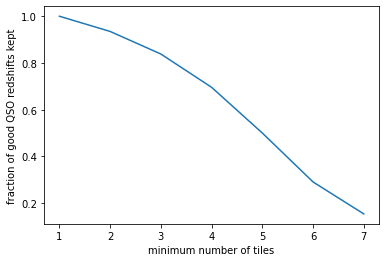

In [5]:
print('total number of unique reachable QSO targets is '+str(len(ff)))
wo = ff['LOCATION_ASSIGNED'] == 1
print('total number of unique observed QSO targets is '+str(len(ff[wo])))
wz = ff['ZWARN'] == 0
print('total number of unique QSO targets with good redshifts is '+str(len(ff[wz])))
wq = ff['SPECTYPE'] == 'QSO'
print('total number of unique QSO targets with good redshifts and spectype qso is '+str(len(ff[wz&wq])))

print('targeting completeness is '+str(len(ff[wo])/len(ff)))
print('redshift success rate is '+str(len(ff[wz])/len(ff[wo])))
ngl = [len(ff[wz])]
ntm = [1]
for nt in range(1,7):
    wt = ff['NTILE'] > nt
    ntm.append(nt+1)
    ngl.append(len(ff[wz&wt]))
plt.plot(ntm,np.array(ngl)/len(ff[wz]))
plt.xlabel('minimum number of tiles')
plt.ylabel('fraction of good QSO redshifts kept')
plt.show()


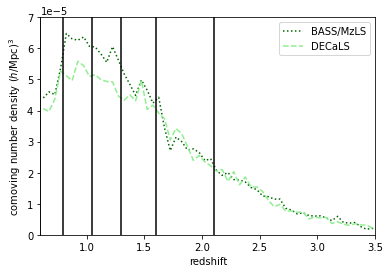

In [9]:
nz = np.loadtxt('/global/cfs/cdirs/desi/survey/catalogs/SV3/LSS/LSScats/test/QSO_N_nz.dat').transpose()
plt.plot(nz[0],nz[3],':',color='darkgreen',label='BASS/MzLS')
nz = np.loadtxt('/global/cfs/cdirs/desi/survey/catalogs/SV3/LSS/LSScats/test/QSO_S_nz.dat').transpose()
plt.plot(nz[0],nz[3],'--',color='lightgreen',label='DECaLS')
plt.legend()
plt.xlim(0.6,3.5)
plt.ylim(0,0.00007)
xl = [0.32,0.32]
yl = [0,0.001]
plt.plot(xl,yl,'k-')
xl = [0.6,0.6]
yl = [0,0.001]
plt.plot(xl,yl,'k-')
xl = [0.8,0.8]
yl = [0,0.001]
plt.plot(xl,yl,'k-')
xl = [1.05,1.05]
yl = [0,0.001]
plt.plot(xl,yl,'k-')
xl = [1.3,1.3]
yl = [0,0.001]
plt.plot(xl,yl,'k-')
xl = [1.6,1.6]
yl = [0,0.001]
plt.plot(xl,yl,'k-')
xl = [2.1,2.1]
yl = [0,0.001]
plt.plot(xl,yl,'k-')
plt.xlabel('redshift')
plt.ylabel(r'comoving number density ($h$/Mpc)$^3$')
plt.show()

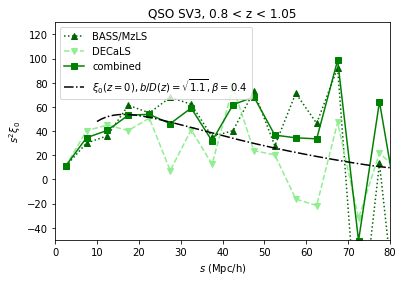

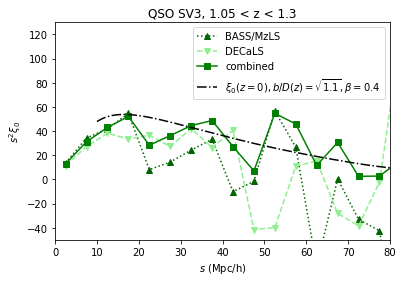

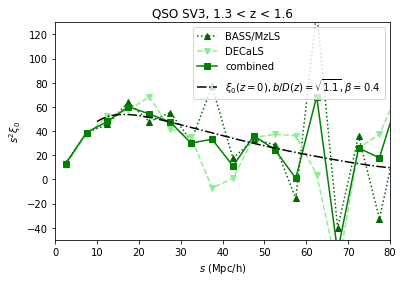

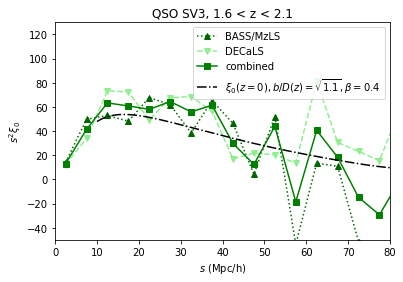

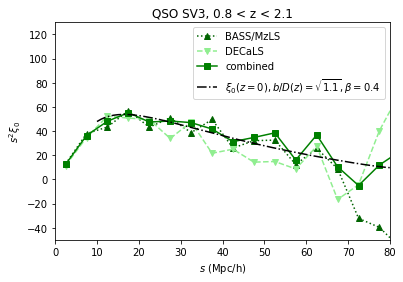

In [12]:
zl = [0.8,1.05,1.3,1.6,2.1]
for i in range(0,len(zl)):
    if i == len(zl)-1:
        zmin=zl[0]
        zmax=zl[-1]
    else:
        zmin = zl[i]
        zmax = zl[i+1]

    xils = np.loadtxt('/global/cscratch1/sd/ajross/SV3xi/xi024SV3_testQSO_S'+str(zmin)+str(zmax)+'5st0.dat').transpose()
    xil = np.loadtxt('/global/cscratch1/sd/ajross/SV3xi/xi024SV3_testQSO'+str(zmin)+str(zmax)+'5st0.dat').transpose()
    xiln = np.loadtxt('/global/cscratch1/sd/ajross/SV3xi/xi024SV3_testQSO_N'+str(zmin)+str(zmax)+'5st0.dat').transpose()
    plt.plot(xil[0],xil[0]**2.*xiln[1],'^:',color='darkgreen',label='BASS/MzLS')
    plt.plot(xil[0],xil[0]**2.*xils[1],'v--',color='lightgreen',label='DECaLS')
    plt.plot(xil[0],xil[0]**2.*xil[1],'s-g',label='combined')
    xilin = np.loadtxt(os.environ['HOME']+'/BAOtemplates/xi0Challenge_matterpower0.44.04.08.015.00.dat').transpose()
    plt.plot(xilin[0],xilin[0]**2.*xilin[1]*1.1,'k-.',label=r'$\xi_{\rm 0}(z=0),b/D(z)=\sqrt{1.1},\beta=0.4$')

    plt.title('QSO SV3, '+str(zmin)+' < z < '+str(zmax))
    plt.xlim(0,80)
    plt.ylim(-50,130)
    plt.xlabel(r'$s$ (Mpc/h)')
    plt.ylabel(r'$s^2\xi_0$')
    plt.legend()
    plt.show()